## <center> Prova [02] - Inteligência Artificial / UFPB - 2021.2 </center>
**Discente:** Lucas Gomes Dantas <br>
**Matrícula:** 20200082925 <br>
**Dataset:** <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>


***

> **[*] Ambiente e Dependências**

In [94]:
from statistics import mode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix, classification_report)
from tensorflow import keras
from keras import (datasets, layers, models, optimizers)
from keras.optimizers import rmsprop_v2
from mlxtend.feature_selection import SequentialFeatureSelector
from google.cloud import automl

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from collections import Counter


**1 -** Utilizando a base de dados de <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>, elabore uma solução para identificar o OUTPUT Grade do estudante.  <br>


> **[#] Dataset**

In [95]:
dstudent = pd.read_csv('student_prediction.csv')
dstudent.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


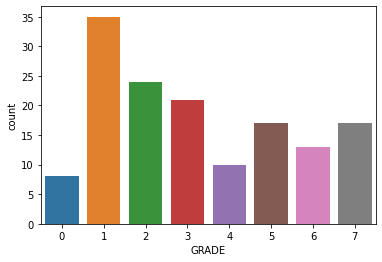

In [96]:
graphstd = sns.countplot(dstudent['GRADE'], label = 'Count')
plt.show()

> **1 [A]** - Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e deixe os seus dados preparados para aplicar o modelo.<br>


>> **[#] Pré-processamento**

In [97]:
dstudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [98]:
dstudent.shape

(145, 33)

In [99]:
dstudent.describe(include=object)

,STUDENTID
count,145
unique,145
top,STUDENT1
freq,1


>>> Apresenta a disposição dos dados para os atributos do tipo object e sua incidência de valores e singularidade.

In [100]:
dstudent = dstudent.drop(['STUDENTID'], axis = 1)

>>> Removendo atributo de valor único, pois é irrelevante ao contexto.

In [101]:
double = dstudent[dstudent.duplicated()]
double

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE


>>> Verificando se há atributos duplicados no dataset.

In [102]:
## corr = dstudent.corr()
## corr.style.background_gradient(cmap = "coolwarm")

>>> Como não há nenhum par de atributos com correlação muito alta, irão permanecer no dataset.

>>> **1 [A - a]** Utilize pelo menos uma forma de redimensionamento de atributos (selecionando ou agregando) e avalie o resultado de utilizar todas eles e essa amostra.


In [103]:
dstudent.corr()['GRADE']

AGE             -0.095251
GENDER           0.335533
HS_TYPE          0.104821
SCHOLARSHIP      0.023963
WORK             0.167445
ACTIVITY        -0.062993
PARTNER         -0.051778
SALARY          -0.166352
TRANSPORT       -0.156289
LIVING           0.023683
MOTHER_EDU       0.066318
FATHER_EDU       0.063504
#_SIBLINGS       0.084470
KIDS             0.066379
MOTHER_JOB      -0.030747
FATHER_JOB      -0.044268
STUDY_HRS       -0.033065
READ_FREQ        0.195617
READ_FREQ_SCI    0.003189
ATTEND_DEPT     -0.184763
IMPACT          -0.203273
ATTEND          -0.139564
PREP_STUDY       0.014638
PREP_EXAM        0.073783
NOTES            0.044862
LISTENS          0.085137
LIKES_DISCUSS    0.146547
CLASSROOM        0.110617
CUML_GPA         0.315493
EXP_GPA          0.248588
COURSE ID        0.142166
GRADE            1.000000
Name: GRADE, dtype: float64

>>> Ao relacionar o atributo GRADE com os demais, é possível identificar a incidência de correlações menores que 0.1 e -0.1, caracterizando uma não correlação. Através dessa condição, irei retirar todos os atributos que atendem a essa característica e verificar o comportamento do dataset posteriormente.

In [104]:
dstudent_drop = dstudent.copy()

dstudent_drop = dstudent_drop.drop(['AGE', 'SCHOLARSHIP', 'ACTIVITY', 'PARTNER', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS', 'READ_FREQ_SCI', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS' ], axis = 1)

In [105]:
dstudent_drop.corr()['GRADE']

GENDER           0.335533
HS_TYPE          0.104821
WORK             0.167445
SALARY          -0.166352
TRANSPORT       -0.156289
READ_FREQ        0.195617
ATTEND_DEPT     -0.184763
IMPACT          -0.203273
ATTEND          -0.139564
LIKES_DISCUSS    0.146547
CLASSROOM        0.110617
CUML_GPA         0.315493
EXP_GPA          0.248588
COURSE ID        0.142166
GRADE            1.000000
Name: GRADE, dtype: float64

> **1 [B]** - Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando a aplicação de técnicas de under ou oversampling para que as classes tenham o mesmo tamanho. <br>

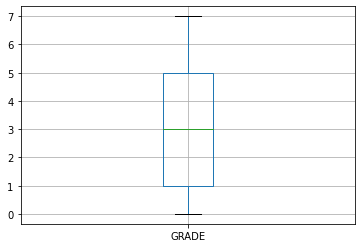

In [106]:
dstudent.boxplot(column=['GRADE'])
plt.show()


>> O boxplot indica uma concentração maior de notas onde incide os menores valores, tendenciando os dados. Diante desse cenário, será aplicada a técnica de oversampling para igualar as menores notas em sentido quantitativo de elementos.

In [107]:
dstudent['GRADE'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

In [108]:
## Dataset principal
dstudent_x = dstudent.copy()
dtest = dstudent_x.drop(['GRADE'], axis = 1)

## Dataset com drop de não correlação
dtest_drop = dstudent_drop.drop(['GRADE'], axis = 1)

In [109]:
## Inicializando configurações do SMOTE para a aplicação do oversampling
smt = SMOTE(sampling_strategy = 'auto', random_state = 42)

In [110]:
## Dataset principal
dtest, dstudent_grade = smt.fit_resample(dtest, dstudent_x['GRADE'])

## Dataset com drop de não correlação
dtest_drop, dstudent_drop = smt.fit_resample(dtest_drop, dstudent_drop['GRADE'])

In [111]:
dstudent_grade.value_counts()

1    35
2    35
5    35
0    35
3    35
4    35
7    35
6    35
Name: GRADE, dtype: int64

In [112]:
## Dataset principal
dstd_balanced = pd.concat([dtest, dstudent_grade], axis = 1)

## Dataset com drop de não correlação
dstd_balanced_drop = pd.concat([dtest_drop, dstudent_drop], axis = 1)

In [113]:
dstd_balanced.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [114]:
dstd_balanced['GRADE'].value_counts()

1    35
2    35
5    35
0    35
3    35
4    35
7    35
6    35
Name: GRADE, dtype: int64

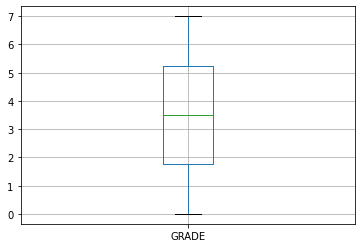

In [115]:
## Dataset principal
dstd_balanced.boxplot(column=['GRADE'])
plt.show()

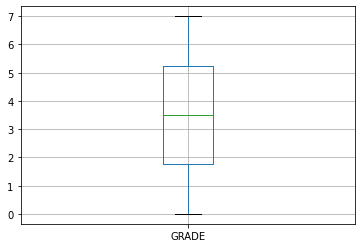

In [116]:
## Dataset com drop de não correlação
dstd_balanced_drop.boxplot(column=['GRADE'])
plt.show()

> **1 [C]** - Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo, teste 3 variações de um dos seus hiperparâmetros. <br>


In [117]:
X = dstd_balanced.iloc[:, :-1].values
y = dstd_balanced.iloc[:, -1].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [119]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((224, 31), (224,)), ((56, 31), (56,)))

In [120]:
## client = automl.AutoMlClient()



> **1 [D]** - Para avaliar os resultados, utilize e explique a matriz de confusão. Além disso, escolha 2 métricas de sua preferência e o que o seu resultado significa. <br>

**2 -** Utilize a mesma base de dados (lembrem de tirar o rótulo, obviamente) da questão anterior de forma que:

> **2 [A]** - Execute o K-means e Hierárquico. <br>

> **2 [B]** - Teste o K igual à 5 e 7. <br>

> **2 [C]** - Na execução do Hierárquico, varie 2 métodos do linkage. <br>

> **2 [D]** - Por fim, faça uma comparação entre os 2 resultados das execuções anteriores e adote uma medida de avaliação própria para clusterização. <br>

**BÔNUS** - Diga vantagens e desvantagens do uso do AUTOML e como você faria para usá-lo, garantindo os melhores resultados possíveis. <br>

***

In [121]:
#!pip3 install math
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install statistics 
#!pip3 install sklearn